In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [185]:
df = pd.read_csv('datawithnewcols.csv',index_col = 0)

In [186]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,...,long,sqft_living15,sqft_lot15,Age_of_House,Years_last_renovation,basement,distance_from_city,distance_from_airport,sqft_living_comparison,sqft_lot_comparison
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,...,-122.257,1340,5650,65,65,False,12.251612,8.232375,0.880597,1.000000
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,...,-122.319,1690,7639,69,29,True,12.613856,30.859494,1.520710,0.948030
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,...,-122.233,2720,8062,87,87,False,16.333282,33.112379,0.283088,1.240387
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,...,-122.393,1360,5000,55,55,True,10.617501,10.988905,1.441176,1.000000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,...,-122.045,1800,7503,33,33,False,21.759524,27.230991,0.933333,1.076903


In [187]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'Age_of_House', 'Years_last_renovation',
       'basement', 'distance_from_city', 'distance_from_airport',
       'sqft_living_comparison', 'sqft_lot_comparison'],
      dtype='object')

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 27 columns):
id                        21597 non-null int64
date                      21597 non-null object
price                     21597 non-null float64
bedrooms                  21597 non-null int64
bathrooms                 21597 non-null float64
sqft_living               21597 non-null int64
sqft_lot                  21597 non-null int64
floors                    21597 non-null float64
view                      21597 non-null float64
condition                 21597 non-null int64
grade                     21597 non-null int64
sqft_above                21597 non-null int64
sqft_basement             21597 non-null float64
yr_built                  21597 non-null int64
yr_renovated              21597 non-null int64
zipcode                   21597 non-null int64
lat                       21597 non-null float64
long                      21597 non-null float64
sqft_living15             2159

In [189]:
df.drop(columns = ['lat','long','yr_built','yr_renovated','sqft_above','sqft_basement'],axis = 1, inplace = True)

In [190]:
# Explore it
numerical_cols = []
for col in df.columns:
    if df[col].dtype in [np.int64, np.float64]:
        numerical_cols.append(col)

len(numerical_cols), numerical_cols

(19,
 ['id',
  'price',
  'bedrooms',
  'bathrooms',
  'sqft_living',
  'sqft_lot',
  'floors',
  'view',
  'condition',
  'grade',
  'zipcode',
  'sqft_living15',
  'sqft_lot15',
  'Age_of_House',
  'Years_last_renovation',
  'distance_from_city',
  'distance_from_airport',
  'sqft_living_comparison',
  'sqft_lot_comparison'])

In [196]:
numerical_cols.remove('id')

In [197]:
numerical_cols

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'view',
 'condition',
 'grade',
 'zipcode',
 'sqft_living15',
 'sqft_lot15',
 'Age_of_House',
 'Years_last_renovation',
 'distance_from_city',
 'distance_from_airport',
 'sqft_living_comparison',
 'sqft_lot_comparison']

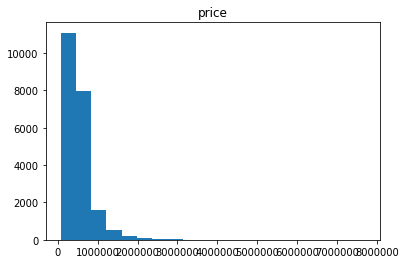

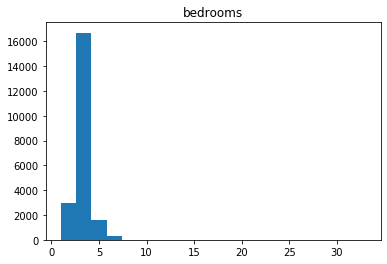

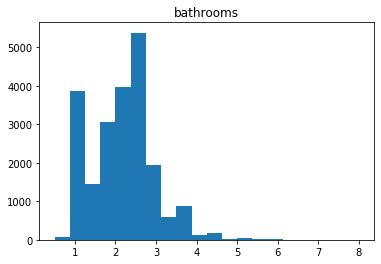

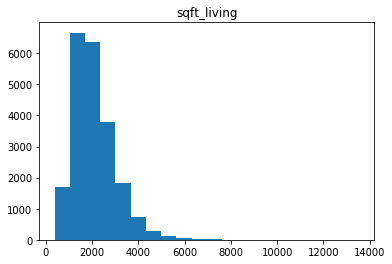

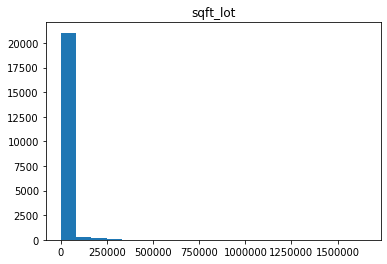

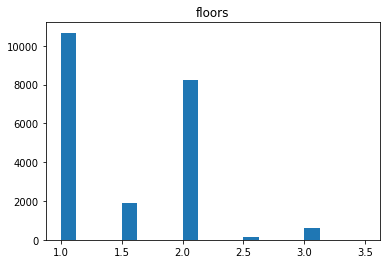

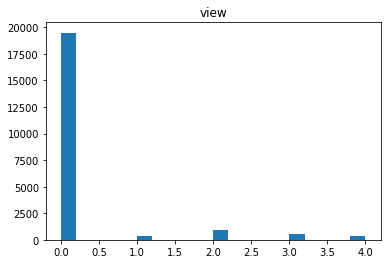

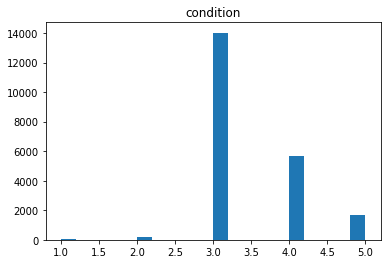

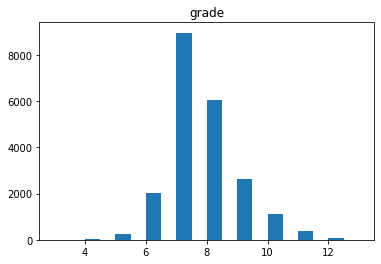

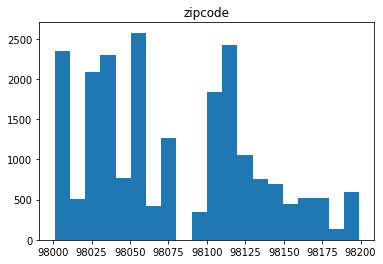

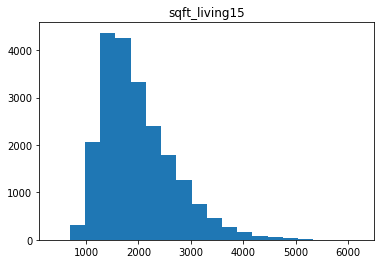

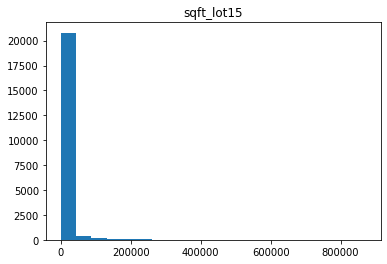

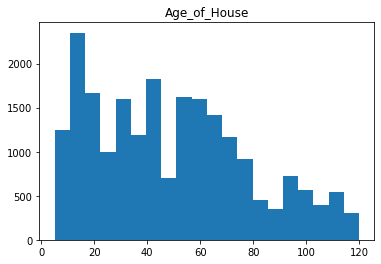

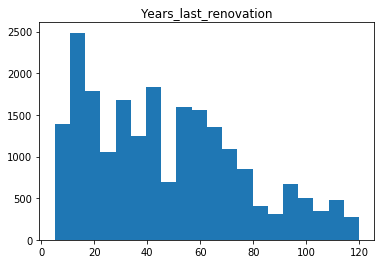

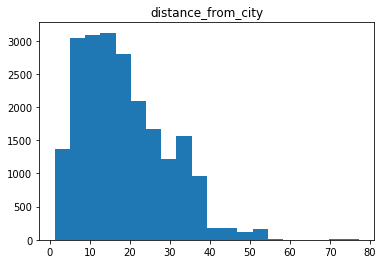

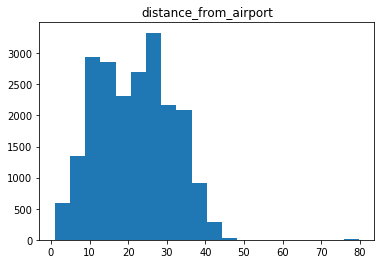

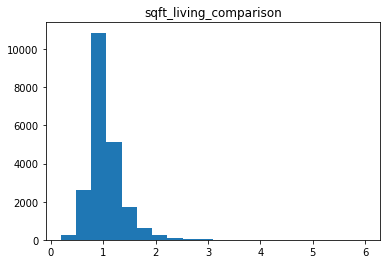

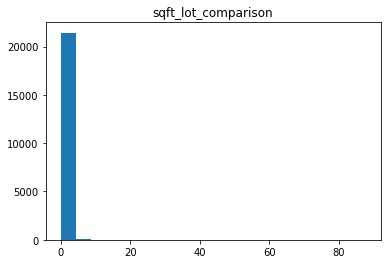

In [198]:
for col in numerical_cols:
    plt.hist(df[col], bins=20)
    plt.title(col)
    plt.show()

In [199]:
corr = df[numerical_cols].corr()

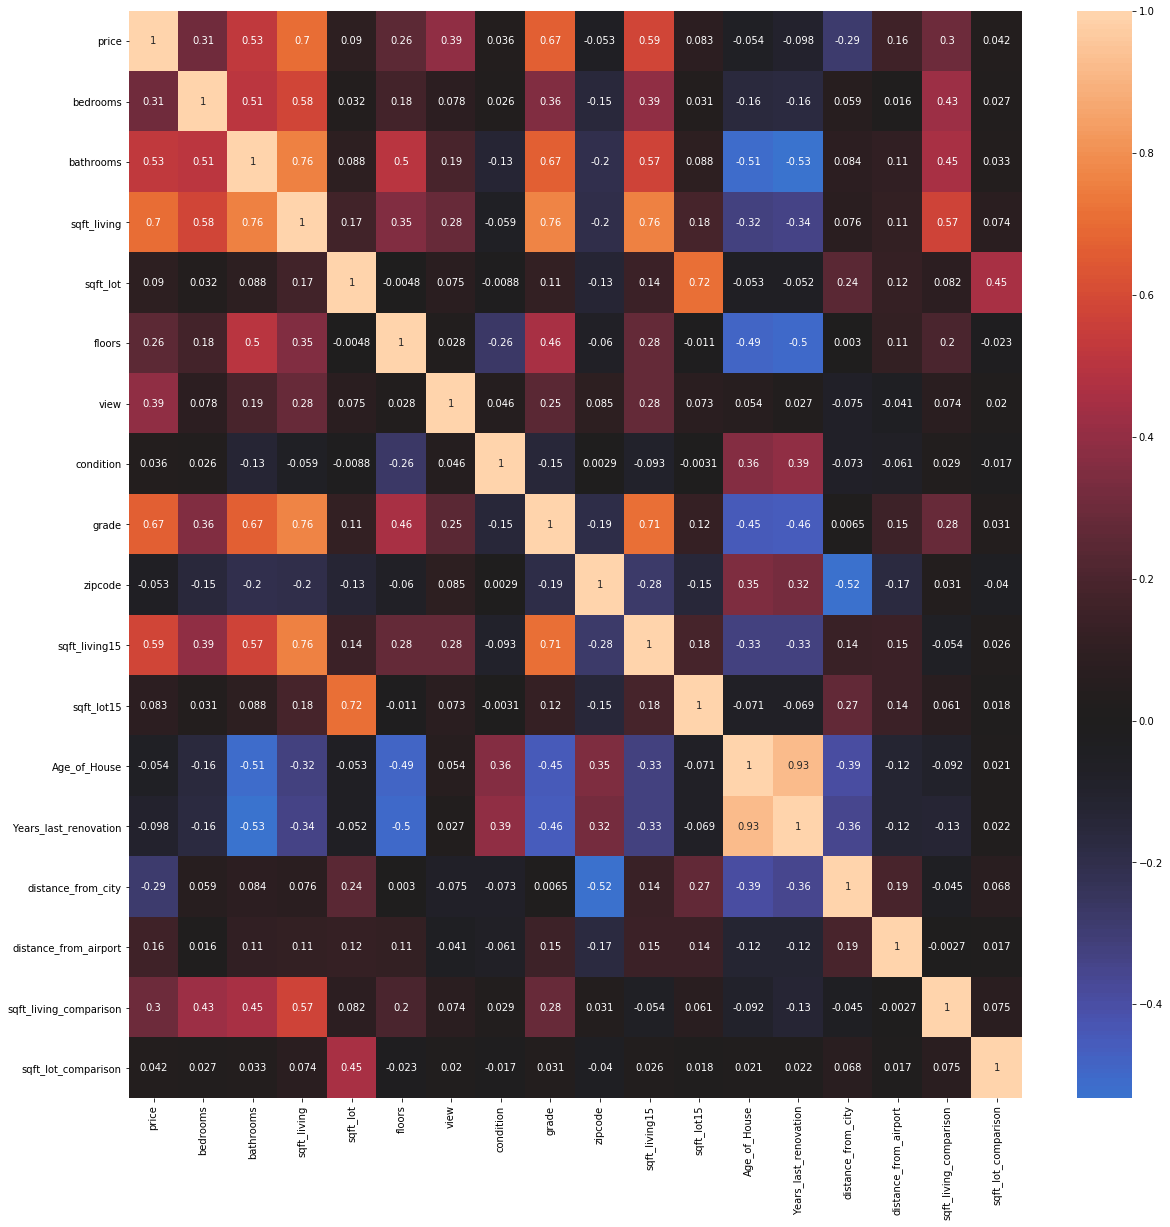

In [200]:
# Your code here
plt.figure(figsize=(20,20))
sns.heatmap(corr, center=0, annot=True);
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [201]:
seattle_lat, seattle_long = 47.608013, -122.335167

In [202]:
import folium
KC_map = folium.Map(location=[seattle_lat,seattle_long], zoom_start=11)
KC_map

(21597, 22)

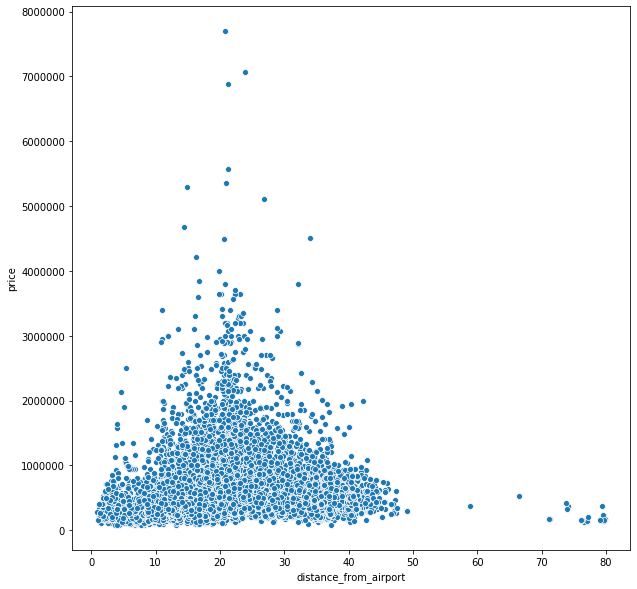

In [209]:
plt.figure(figsize=(10,10))
sns.scatterplot(y='price',x='distance_from_airport',data=df)

In [212]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

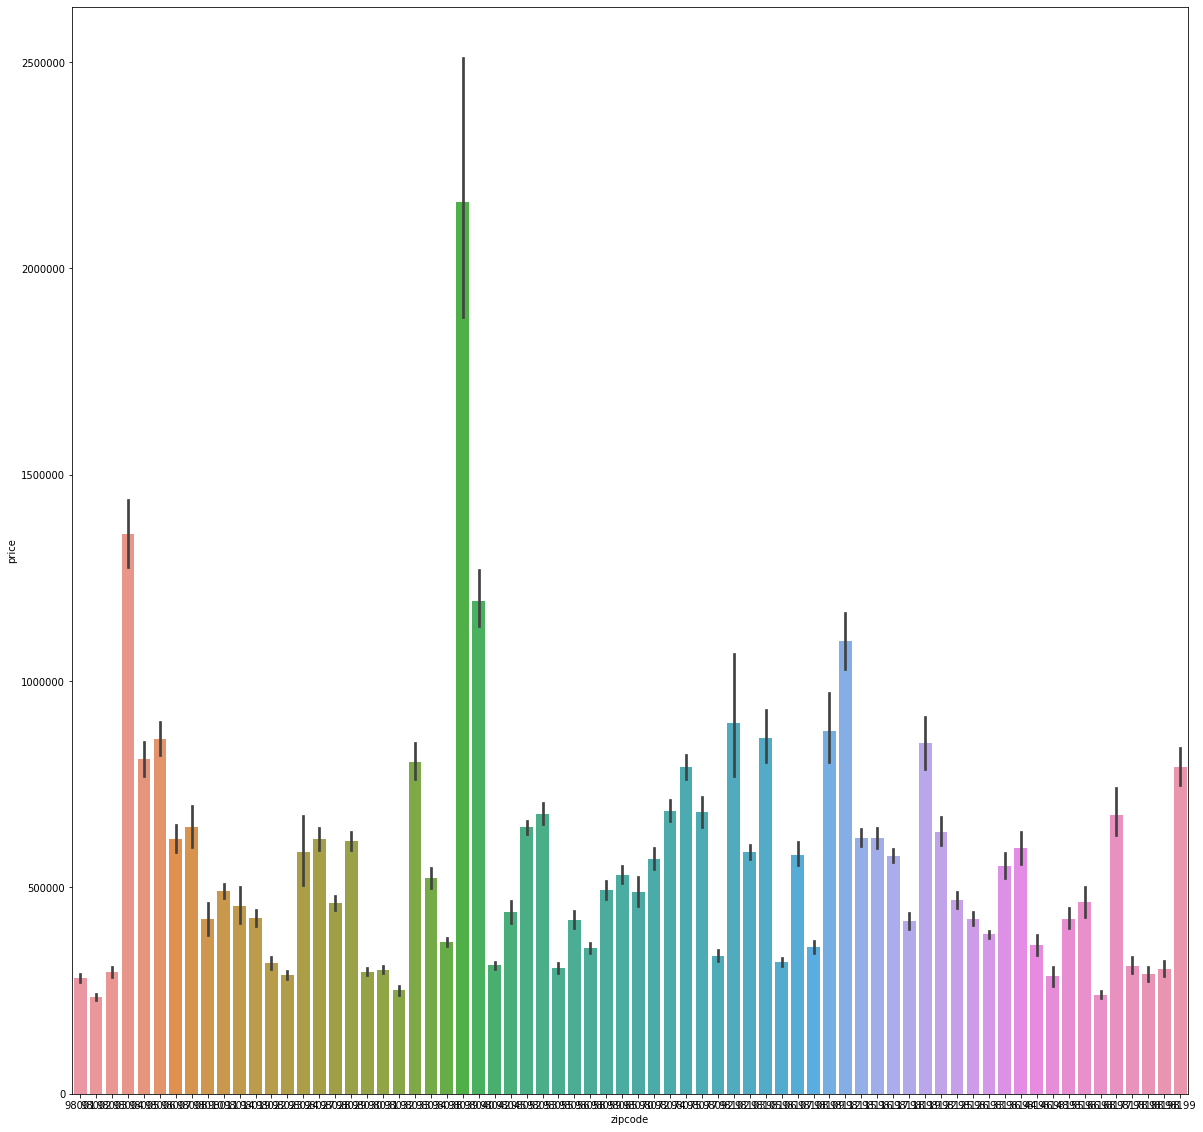

In [213]:
plt.figure(figsize=(20,20))
sns.barplot(x='zipcode',y='price',data=df)